**19/12/2021**
<br>
Bruno Mazzilli González

> # Modelo de Regresión Logística

La regresión logística es un algortimo de Machine Learning que se utiliza para clasificación. Consiste en analizar un conjunto de datos en el que hay una o más variables independientes que determinan un resultado. El resultado se mide con una variable dicotómica, en la que sólo hay dos resultados posibles, en este caso si hubo fallecimiento en un accidente o no.

### Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets, metrics, model_selection

import warnings
warnings.filterwarnings("ignore")

### Importamos datos

In [2]:
X_train = pd.read_parquet('data/x_train.parquet')
print(X_train.shape)
X_train.head(3)

(4816257, 100)


,C_MNTH,V_YEAR,C_HOUR,C_YEAR,C_WTHR_2.0,C_RSUR_7.0,C_TRAF_7.0,V_TYPE_7.0,C_TRAF_10.0,P_PSN_31.0,...,C_VEHS_58.0,P_ISEV_2.0,C_RSUR_9.0,C_VEHS_13.0,P_PSN_97.0,C_CONF_23.0,C_CONF_4.0,C_VEHS_44.0,C_VEHS_35.0,P_PSN_21.0
0,0.181818,0.956140,0.608696,0.933333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.363636,0.877193,0.608696,0.333333,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.636364,0.842105,0.608696,0.800000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_test = pd.read_parquet('data/x_test.parquet')
X_test.reset_index(drop=True, inplace=True)
print(X_test.shape)
X_test.head(3)

(1498866, 100)


,C_MNTH,V_YEAR,C_HOUR,C_YEAR,C_WTHR_2.0,C_RSUR_7.0,C_TRAF_7.0,V_TYPE_7.0,C_TRAF_10.0,P_PSN_31.0,...,C_VEHS_58.0,P_ISEV_2.0,C_RSUR_9.0,C_VEHS_13.0,P_PSN_97.0,C_CONF_23.0,C_CONF_4.0,C_VEHS_44.0,C_VEHS_35.0,P_PSN_21.0
0,0.636364,0.842105,0.521739,0.066667,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.272727,0.780702,0.956522,0.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.363636,0.973684,0.478261,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = pd.read_parquet('data/y_train.parquet')
print(Y_train.shape)
Y_train.head(3)

(4816257, 1)


,target_c_sev
0,0
1,0
2,0


In [5]:
Y_test = pd.read_parquet('data/y_test.parquet')
Y_test.reset_index(drop=True, inplace=True)
print(Y_test.shape)
Y_test.head(3)

(1498866, 1)


,target_c_sev
0,0
1,0
2,0


### Logistic Regression Model

In [6]:
%%time

#función del modelo:
logit_model = LogisticRegression(solver = "saga",
                                 penalty = "l1", 
                                 class_weight = "balanced", 
                                 C = 1.0, 
                                 max_iter = 500)

#entrenamos el modelo 
logit_model.fit(X_train, np.ravel(Y_train))


#hacemos la prediccion del target con los datos del test set
pred_logit = logit_model.predict(X_test)

CPU times: user 9min 21s, sys: 15.4 s, total: 9min 37s
Wall time: 9min 50s


### Matriz de Confusión

La matriz de confusión de un problema de clase n es una matríz nxn en la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

Accuracy: Es el porcentaje total de elementos clasificados correctamente.

In [7]:
def conf_matrix(Y_test, Y_pred): # comparamos los resultados de las predicciones de la variable target vs la real del test set
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

           0       0.99      0.74      0.85   1474318
           1       0.04      0.70      0.08     24548

    accuracy                           0.74   1498866
   macro avg       0.52      0.72      0.46   1498866
weighted avg       0.98      0.74      0.84   1498866



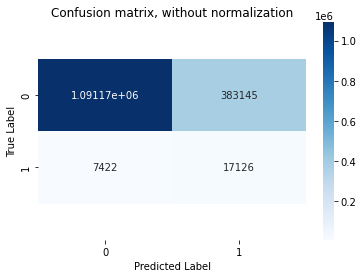

In [8]:
conf_matrix(Y_test, pred_logit)
print(classification_report(Y_test, pred_logit))

### Matriz de Confusión Normalizada

In [9]:
def conf_matrix_norm(Y_test, Y_pred): 
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred,  normalize='true')
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

           0       0.99      0.74      0.85   1474318
           1       0.04      0.70      0.08     24548

    accuracy                           0.74   1498866
   macro avg       0.52      0.72      0.46   1498866
weighted avg       0.98      0.74      0.84   1498866



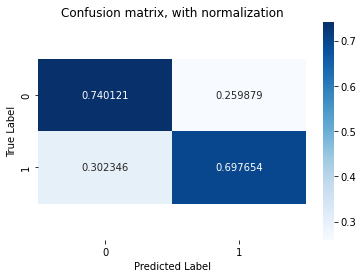

In [10]:
pred_logit = logit_model.predict(X_test)
conf_matrix_norm(Y_test, pred_logit)
print(classification_report(Y_test, pred_logit))

### Curva ROC:

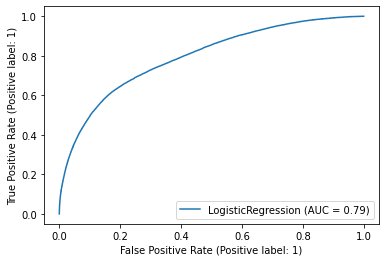

Logistic Regression score train:  0.7378084267513133
Logistic Regression score:  0.7394250053040098


In [11]:
metrics.plot_roc_curve(logit_model, X_test, Y_test)                             # CURVA ROC
plt.show()                     
print("Logistic Regression score train: ", logit_model.score(X_train, Y_train)) # score train
print("Logistic Regression score: ", logit_model.score(X_test, Y_test))         # score test


### Gain Curve:

Se utiliza para evaluar el rendimiento del modelo de clasificación. Miden como un modelo es capaz de mejorar una predicción aleatoria, es decir cómo es de útil el modelo para predecir valores.

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

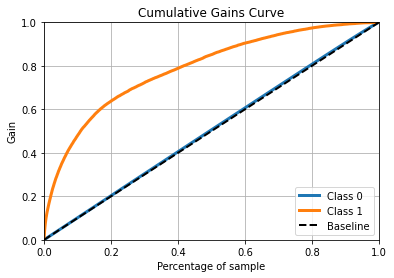

In [12]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = logit_model.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probabilities)

### Feature importance

Determina cuáles son las variables que más influyen en el modelo:

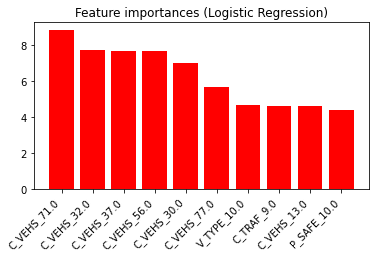

In [13]:
coefs = np.abs(logit_model.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [19]:
logit_model.coef_[0]

array([ 1.30402964e-01, -3.27938094e-01, -2.24016602e-01, -2.25581937e-01,
        1.05693886e-01, -1.36916702e+00, -1.37431055e+00,  6.28038014e-01,
        9.41851811e-01, -1.40550309e+00, -8.43911270e-01, -3.49769240e-01,
       -6.09774086e-01, -5.78767189e-01, -3.97286110e-01, -4.66760876e+00,
       -1.86524264e+00,  6.57708973e-01, -7.77808779e-01, -2.04643008e+00,
       -3.09422329e+00, -4.46122749e-01,  1.01657456e+00, -2.49190081e+00,
        1.70962362e-01,  2.19046372e+00, -3.00988348e+00, -3.69021249e-01,
        9.88935107e-02, -3.66252774e+00, -8.23060687e-01,  6.58039763e-01,
        2.56665966e+00, -1.98706048e+00,  1.12978418e-01,  3.86419924e-03,
        5.68567838e+00, -4.42024793e+00, -1.76919186e+00, -3.41404611e-01,
       -6.80385377e-01, -2.05012409e+00,  1.10593687e+00, -1.46514834e+00,
       -1.04729211e-01, -6.91930973e-01,  4.66525844e-01, -4.26216685e-01,
        2.60516588e-01, -4.07761899e+00,  7.02188631e+00, -7.61356594e-01,
       -2.78971871e+00,  

### Guardamos el modelo

In [15]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [16]:
save_models('models/logit_model.pkl', logit_model) 